In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate random data
np.random.seed(42)
x = np.random.uniform(500, 2500, 50)  # size in ft²
noise = np.random.normal(0, 30, size=x.shape)  # some noise
y = 0.06 * x + 50 + noise  # price in $1000s

Text(0.5, 1.0, 'random data')

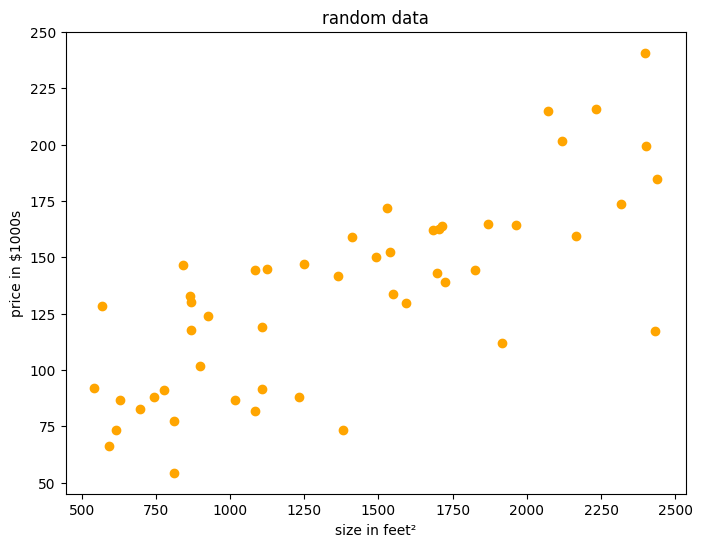

In [4]:
# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orange', label='Data points')
plt.xlabel('size in feet²')
plt.ylabel('price in $1000s')
plt.title('random data')
# plt.title(r'$f_{w,b}(x) = wx + b$ (function of $x$)')

### 📘 Cost Function Definition

The **linear model** is:

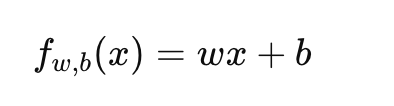

The **cost function** is defined as:


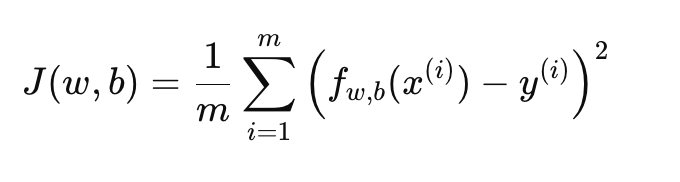


Where:
- \( m \) = number of training examples  
- \( x^{(i)} \) = input feature (e.g., house size)  
- \( y^{(i)} \) = true output (e.g., house price)  
- \( w \), \( b \) = parameters (weight and bias)

We aim to find values of \( w \) and \( b \) that **minimize** \( J(w, b) \).



In [6]:
## compute cost

def compute_cost(x,y,w,b):
    m = len(x) ## m is the number of x values in the training set
    preds = w*x + b ## preds is short for predictions
    cost = (1/m) * np.sum((preds - y) ** 2)
    return cost

In [7]:
## create a grid of different w and b values

# Generate grid of w and b values
W = np.linspace(0.03, 0.09, 100)
B = np.linspace(40, 60, 100)
J_vals = np.zeros((len(W), len(B)))

In [8]:

# Compute cost over the grid
for i in range(len(W)):
    for j in range(len(B)):
        J_vals[i, j] = compute_cost(x, y, W[i], B[j])

In [9]:
# Create meshgrid for plotting
W_mesh, B_mesh = np.meshgrid(W, B)

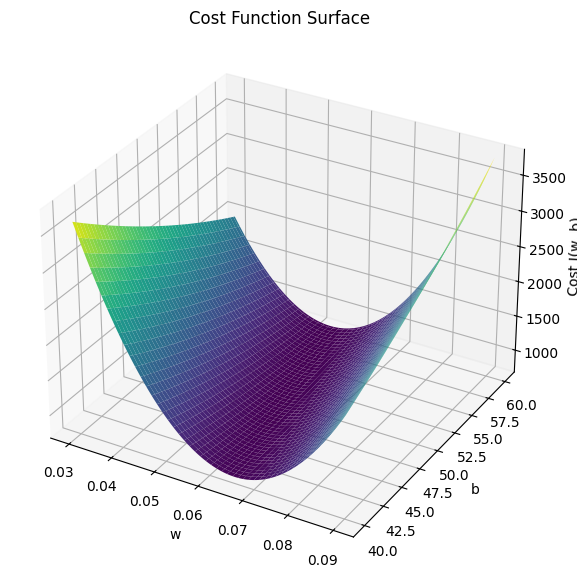

In [10]:
# Plot 3D surface
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_mesh, B_mesh, J_vals.T, cmap='viridis', edgecolor='none')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost J(w, b)')
ax.set_title('Cost Function Surface')
plt.show()


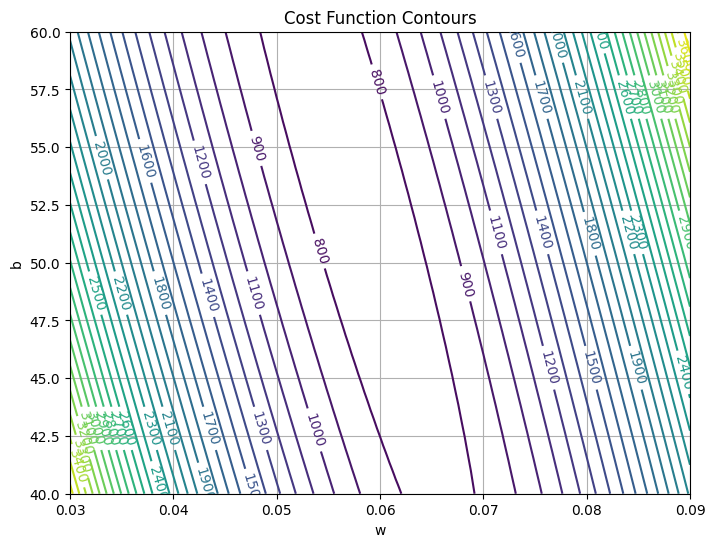

In [13]:
# Optional: Contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(W, B, J_vals.T, levels=30, cmap='viridis')
plt.clabel(contour, inline=True)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost Function Contours')
plt.grid(True)
plt.show()

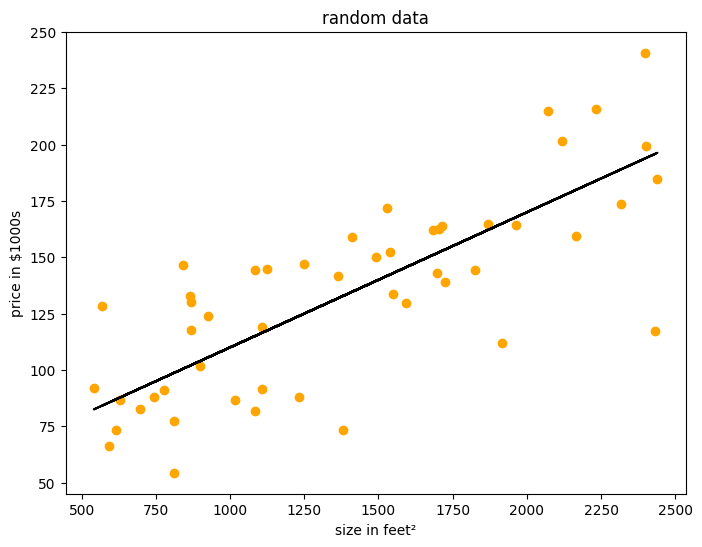

In [ ]:
## plot the data and visualize the line 

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='orange', label='Data points')
plt.xlabel('size in feet²')
plt.ylabel('price in $1000s')
plt.title('random data')

## choose values from the center of the contour 
w = 0.06
b = 50

# Generate predicted y values using the line equation
x_line = x # use the x values from the training set 
y_line = w * x_line + b 

# Plot the regression line
plt.plot(x_line, y_line, color='black', label=f'Line: y = {w}x + {b}')


